## UAS Data Mining
### Muhammad Qalbu Dary (F1D018040)
#### Penjelasan Data dan Variasi
import library yang akan digunakan

In [1]:
import pandas as pd
from random import randint,uniform
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("Final_Pulse_Data.csv")

c:\users\9desi\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Melihat nama-nama kolom yang akan digunakan dan menghitung jumlah NaN di setiap kolomnya

In [4]:
dataset.columns

Index(['Enough of the kinds of food wanted',
       'Enough Food, but not always the kinds wanted',
       'Sometimes not enough to eat', 'Often not enough to eat',
       'Did not report', 'Age', 'Sex_At_Birth', 'Race', 'Education',
       'Marital_Status', 'Children_Present', 'Unemployed_Last_4',
       'Employed_Last_7', 'Reason_Not_Working', 'Receiving_Pay_No_Work',
       'Income', 'Health_Status', 'Freq_Feel_Anxious',
       'Freq_Feel_Control_Worry', 'Freq_Feel_Lil_Interest',
       'Freq_Feel_Depressed', 'Covered_By_Insurance', 'Caught_Up_On_Mortgage',
       'Conf_Pay_Next_Rent_or_Mortgage', 'Free_Groceries',
       'Provider_Of_Free_Groceries', 'Location', 'Week', 'Household_Size',
       'Used_To_Meet_Needs', 'House_Receives_SNAP', 'Active_Duty',
       'Difficulty_Seeing', 'Difficulty_Hearing', 'Difficulty_Remembering',
       'Difficulty_Walking_Climbing', 'Sexual_Orientation', 'LGBT',
       'week_name', 'Year'],
      dtype='object')

In [5]:
dataset.isnull().sum()

Enough of the kinds of food wanted                   0
Enough Food, but not always the kinds wanted         0
Sometimes not enough to eat                          0
Often not enough to eat                              0
Did not report                                       0
Age                                             293393
Sex_At_Birth                                    302706
Race                                            298083
Education                                       298820
Marital_Status                                  298083
Children_Present                                303242
Unemployed_Last_4                               301165
Employed_Last_7                                 301165
Reason_Not_Working                              272556
Receiving_Pay_No_Work                           300428
Income                                          291919
Health_Status                                   299356
Freq_Feel_Anxious                               295403
Freq_Feel_

In [56]:
df = dataset[['Enough of the kinds of food wanted','Location','Week','Education']]

#### Preprocessing
Melakukan feature extraction

In [57]:
df.isnull().sum()

Enough of the kinds of food wanted         0
Location                                   0
Week                                       0
Education                             298820
dtype: int64

Mengubah nama kolom agar lebih mudah diketik dan menghapus row yang memiliki NaN

In [58]:
df.columns=['A','Location','Week','Education']

In [59]:
df = df.dropna()

Membuat String indexer dengan method **unique()** untuk mendapatkan hasil korelasi kolom yang bertipe Object/Categorical 

In [60]:
def stringIndexer(attr):
    uni = list(df[attr].unique())
    inp = list(df[attr].to_numpy())
    out = []
    for x in inp:
        out.append(uni.index(x))
    return out

In [61]:
def multiStringIndexer(attrs):
    for x in attrs:
        df[x+'_index'] = pd.Series(stringIndexer(x),index=df.index)

In [62]:
multiStringIndexer(['Location','Week','Education'])

In [63]:
df.corr()

,A,Location_index,Week_index,Education_index
A,1.000000,-1.855797e-01,6.982199e-03,1.217983e-01
Location_index,-0.185580,1.000000e+00,1.817720e-16,5.659427e-17
Week_index,0.006982,1.817720e-16,1.000000e+00,1.068278e-15
Education_index,0.121798,5.659427e-17,1.068278e-15,1.000000e+00


#### ARM  
Menggunakan Algoritma FP-Growth

In [64]:
import pyfpgrowth

In [65]:
df.head()

,A,Location,Week,Education,Location_index,Week_index,Education_index
12,7370256.0,US,week1,Less than high school,0,0,0
13,42584525.0,US,week1,High school or GED,0,0,1
14,40825851.0,US,week1,Some college/associate’s degree,0,0,2
15,51912582.0,US,week1,Bachelor’s degree or higher,0,0,3
119,135057.0,AL,week1,Less than high school,1,0,0


In [66]:
df.shape

(6968, 7)

In [67]:
patterns = pyfpgrowth.find_frequent_patterns(df, 5)
for p,d in patterns.items():
    print(p,":",d)

('d', 'o') : 5
('d', 'i', 'o') : 9
('d', 'n', 'o') : 9
('d', 'i', 'n', 'o') : 9
('d', 'e') : 6
('d', 'e', 'i') : 9
('d', 'e', 'n') : 9
('d', 'e', 'i', 'n') : 9
('d', 'n') : 8
('d', 'i') : 8
('d', 'i', 'n') : 11
('o',) : 6
('n', 'o') : 9
('i', 'o') : 9
('i', 'n', 'o') : 9
('i',) : 7
('n',) : 7
('i', 'n') : 9
('e',) : 7
('e', 'n') : 5
('e', 'i') : 5
('e', 'i', 'n') : 5


In [68]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.3)
for p,d in rules.items():
    print("Kemungkinan",d[0],"Setelah" ,p,"adalah",d[1]*100,"%")

Kemungkinan ('i', 'n') Setelah ('o',) adalah 150.0 %
Kemungkinan ('e', 'n') Setelah ('i',) adalah 71.42857142857143 %
Kemungkinan ('n',) Setelah ('d', 'i') adalah 137.5 %
Kemungkinan ('i', 'n') Setelah ('d', 'o') adalah 180.0 %
Kemungkinan ('n',) Setelah ('i', 'o') adalah 100.0 %
Kemungkinan ('e', 'i') Setelah ('n',) adalah 71.42857142857143 %
Kemungkinan ('i',) Setelah ('d', 'n') adalah 137.5 %
Kemungkinan ('i',) Setelah ('n', 'o') adalah 100.0 %
Kemungkinan ('e',) Setelah ('i', 'n') adalah 55.55555555555556 %
Kemungkinan ('e',) Setelah ('d', 'i', 'n') adalah 81.81818181818183 %
Kemungkinan ('n',) Setelah ('d', 'i', 'o') adalah 100.0 %
Kemungkinan ('i',) Setelah ('d', 'n', 'o') adalah 100.0 %
Kemungkinan ('d',) Setelah ('i', 'n', 'o') adalah 100.0 %
Kemungkinan ('i', 'n') Setelah ('e',) adalah 71.42857142857143 %
Kemungkinan ('i', 'n') Setelah ('d', 'e') adalah 150.0 %
Kemungkinan ('n',) Setelah ('e', 'i') adalah 100.0 %
Kemungkinan ('i',) Setelah ('e', 'n') adalah 100.0 %
Kemungkinan

Dapat dilihat diatas Rules-rules yang terekstrak dari pengunaan ARM mengunakan Algoritma FP-Growth  
#### Skyline Query

Text(0.5, 1.0, 'Kemampuan Membeli makan bedasarkan Edukasi')

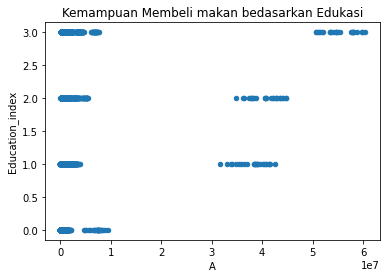

In [69]:
ax = df.plot.scatter(x='A', y='Education_index')
ax.set_title('Kemampuan Membeli makan bedasarkan Edukasi')

In [70]:
def a_dominates_b(a, b, to_min, to_max):
    n_better = 0
    for f in to_min:
        if a[f] > b[f]:
            return False
        n_better += a[f] < b[f]
    for f in to_max:
        if a[f] < b[f]:
            return False
        n_better += a[f] > b[f]
    if n_better > 0:
        return True
    return False

In [71]:
def find_skyline_brute_force(df, to_min, to_max):
    rows = df.to_dict(orient='index')
    skyline = set()
    for i in rows:
        dominated = False
        for j in rows:
            if i == j:
                continue
            if a_dominates_b(rows[j], rows[i], to_min, to_max):
                dominated = True
                break
        if not dominated:
            skyline.add(i)
    return pd.Series(df.index.isin(skyline), index=df.index)

Text(0.5, 1.0, 'Kemampuan makan yang cukup bedasarkan Edukasi - Skyline')

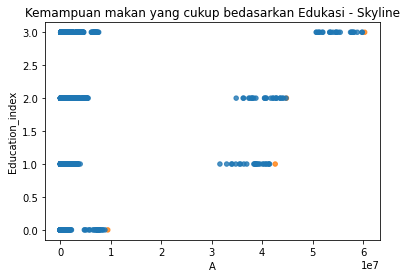

In [72]:
skyline = find_skyline_brute_force(df, to_min=['Education_index'], to_max=['A'])

colors = skyline.map({True: 'C1', False: 'C0'})
ax = df.plot.scatter(x='A', y='Education_index', c=colors, alpha=0.8)
ax.set_title('Kemampuan makan yang cukup bedasarkan Edukasi - Skyline')

Preferensi yang dilakukan adalah untuk mencari data dimana Nilai pendidikan atau **Education_index** kecil yaitu pendidikan yang rendah  
akan tetapi tetap bisa cukup makan yang diingikan